Задание Pro

Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).

Последовательность шагов:
1. В графическом редакторе рисуем произвольную цифру.
2. Сохраняем документ и загружаем его в Colaboratory.
3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
5. Выполняем инверсию цветов, нормирование и решейп массива.
6. Выполняем распознавание собственной рукописной цифры.

In [ ]:
# Подключение всех необходимых библиотек 

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image

import pandas as pd  
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline


Mounted at /content/drive


## Обучение нейронной сети 

In [ ]:
# Загрузим данные MNIST
(x_train_org, y_train_org),(x_test_org, y_test_org)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


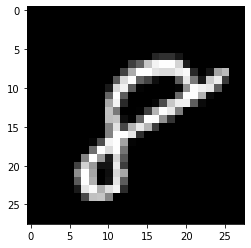

(28, 28)

In [ ]:
# Выбираем одну картинку для просмотра (просто для примера)
n = 59999
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))
plt.show()
x_train_org[n].shape

In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000,784)
x_test = x_test_org.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Нормализуем входные данные. В промежутке от 0 до 1
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org,10)
y_test = utils.to_categorical(y_test_org,10)

In [ ]:
# Создаем нейронную сеть
model = Sequential()
model.add(Dense(100, input_dim = 784, activation = "relu"))
model.add(Dense(5000, activation = "relu"))
model.add(Dense(10,activation = "softmax"))

model.compile(loss="categorical_crossentropy" , optimizer ="adam", metrics = ["accuracy"])

# Обучение нейронной сети
model.fit (x_train, y_train, batch_size=128, epochs=15, verbose=1) 

Epoch 1/15
469/469 [==============================] - 9s 17ms/step - loss: 0.4594 - accuracy: 0.8637
Epoch 2/15
469/469 [==============================] - 8s 17ms/step - loss: 0.1069 - accuracy: 0.9678
Epoch 3/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0734 - accuracy: 0.9766
Epoch 4/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0533 - accuracy: 0.9826
Epoch 5/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0356 - accuracy: 0.9881
Epoch 6/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0320 - accuracy: 0.9900
Epoch 7/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0248 - accuracy: 0.9918
Epoch 8/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 9/15
469/469 [==============================] - 8s 18ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 10/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0196 - accura

## После обучения сети попробуем распознать все десять цифр нарисованные в Paint. Для примера цифры разной толщины и силя написания

# Распознование цифры 0

(28, 28)


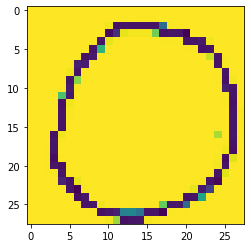

In [ ]:
# Загружаем и гугл диска картинку. Присваеваем ее переменной, и так же сразу задаем размер 28х28
test_0 = image.load_img('/content/0.jpg',target_size=(28,28) , color_mode='grayscale')

# Посмотрим на результат
print(test_0.size)
plt.imshow(test_0)
plt.show()

In [ ]:
# Преобразуем изображение в numpy-массив
test_0 = image.img_to_array(test_0)

print(test_0.shape)

(28, 28, 1)


In [ ]:
# Делаем инверсию цветов
test_0  = 255- test_0
test_0.shape

(28, 28, 1)

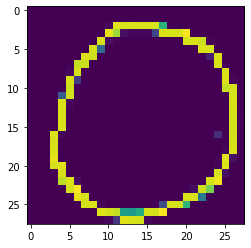

In [ ]:
# Для просмотра инверсии цвета, переводим массив обратно в картинку. Просто для теста. Ячейка запускать не будет, чтобы потом снова не переводить в массив
test_0 = image.array_to_img(test_0)

# Посмотрим на результат
plt.imshow(test_0)
plt.show()

In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
test_0 = test_0.reshape(1,784)
print(test_0.shape)

(1, 784)


In [ ]:
# Нормализуем входные данные. В промежутке от 0 до 1
test_0 = test_0.astype('float32')
test_0 = test_0 / 255

In [ ]:
# Распознаем пример 
predict_0 = model.predict(test_0)
print(predict_0)

[[7.0546982e-09 5.0647118e-06 1.0856652e-05 1.6351767e-02 2.1762413e-10
  9.8347652e-01 1.6676450e-08 1.5509382e-04 1.6174355e-11 7.1637982e-07]]


In [ ]:
pred_0 = np.argmax(predict_0)
print("Ответ:",pred_0)
# Ответ верный

Ответ: 5


Сколько бы угодно разных картинок с изображение цифры 0 я не пробовал, сеть упорно считатает ее цифрой 5. Изменение толщины, размера или формы цифры 0 не приводит к положительным результатам

# Распознавание остальных цифр

Дальше чтобы код читался проще и не был таким большим, будет приводиться пример без комментариев, в одну ячейку.

Было перепробовано много разных написаний цифр, стилей, форм и даже цвета

Вывод в конце работы

# Распознование цифры 1

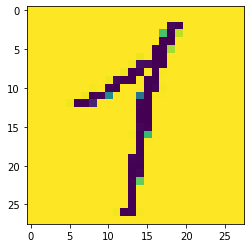

Ответ:  1


In [ ]:
test_1 = image.load_img('/content/1.jpg',target_size=(28,28), color_mode='grayscale')
plt.imshow(test_1)
plt.show()

test_1 = image.img_to_array(test_1)
test_1  = 255 - test_1

test_1 = test_1.reshape(1, 784)

test_1 = test_1.astype('float32')
test_1 = test_1 / 255

predict = model.predict(test_1)

pred = np.argmax(predict)
print("Ответ: ",pred)

# Распозвование цифры 2

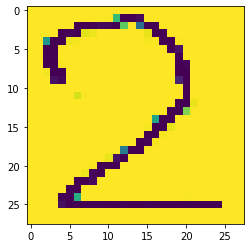

Ответ: 2


In [ ]:
test_2 = image.load_img('/content/2.jpg',target_size=(28,28) , color_mode='grayscale')
plt.imshow(test_2)
plt.show()

test_22 = image.img_to_array(test_2)
test_22  = 255-test_22

test_22 = test_22.reshape(1, 784)

test_22 = test_22.astype('float32')
test_22 = test_22 / 255

predict_2 = model.predict(test_22)

pred_2 = np.argmax(predict_2)
print("Ответ:", pred_2)

# Распознавание цифры 3

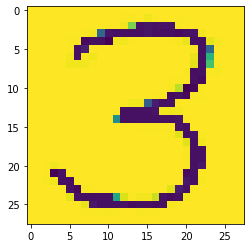

Ответ:  3


In [ ]:
test_3 = image.load_img('/content/3.jpg',target_size=(28,28) , color_mode='grayscale')
plt.imshow(test_3)
plt.show()

test_3 = image.img_to_array(test_3)
test_3  = 255-test_3

test_3 = test_3.reshape(1, 784)

test_3 = test_3.astype('float32')
test_3 = test_3 / 255

predict_3 = model.predict(test_3)

pred_3 = np.argmax(predict_3)
print("Ответ: ",pred_3)

# Распознование цифры 3 похожая на 5

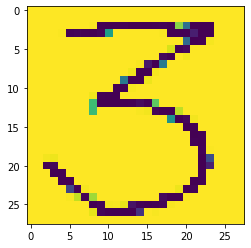

Ответ:  5


In [ ]:
test_3 = image.load_img('/content/3 or 5.jpg',target_size=(28,28) , color_mode='grayscale')
plt.imshow(test_3)
plt.show()

test_3 = image.img_to_array(test_3)
test_3  = 255-test_3

test_3 = test_3.reshape(1, 784)

test_3 = test_3.astype('float32')
test_3 = test_3 / 255

predict_3 = model.predict(test_3)

pred_3 = np.argmax(predict_3)
print("Ответ: ",pred_3)

# Распознование цифры 4

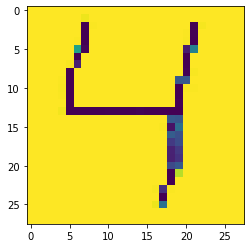

Ответ:  4


In [ ]:
test_4 = image.load_img('/content/4.jpg',target_size=(28,28) , color_mode='grayscale')
plt.imshow(test_4)
plt.show()

test_4 = image.img_to_array(test_4)
test_4  = 255-test_4

test_4 = test_4.reshape(1, 784)

test_4 = test_4.astype('float32')
test_4 = test_4 / 255

predict_4 = model.predict(test_4)

pred_4 = np.argmax(predict_4)
print("Ответ: ",pred_4)

# Распознование цифры 5

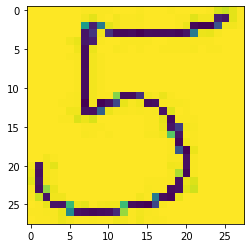

Ответ:  5


In [ ]:
test_5 = image.load_img('/content/5.jpg',target_size=(28,28) , color_mode='grayscale')
plt.imshow(test_5)
plt.show()

test_5 = image.img_to_array(test_5)
test_5  = 255-test_5

test_5 = test_5.reshape(1, 784)

test_5 = test_5.astype('float32')
test_5 = test_5 / 255

predict_5 = model.predict(test_5)

pred_5 = np.argmax(predict_5)
print("Ответ: ",pred_5)

# Распознование цифры 6

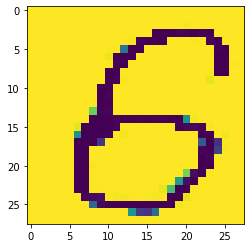

Ответ:  6


In [ ]:
test_6 = image.load_img('/content/6.jpg',target_size=(28,28) , color_mode='grayscale')
plt.imshow(test_6)
plt.show()

test_6 = image.img_to_array(test_6)
test_6  = 255-test_6

test_6 = test_6.reshape(1, 784)

test_6 = test_6.astype('float32')
test_6 = test_6 / 255

predict_6 = model.predict(test_6)

pred_6 = np.argmax(predict_6)
print("Ответ: ",pred_6)

# Распознование цифры 6 похожая на 5

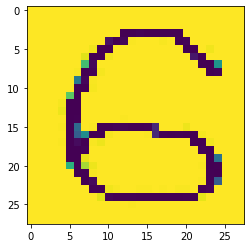

Ответ:  5


In [ ]:
test_6 = image.load_img('/content/6 or 5.jpg',target_size=(28,28) , color_mode='grayscale')
plt.imshow(test_6)
plt.show()

test_6 = image.img_to_array(test_6)
test_6  = 255-test_6

test_6 = test_6.reshape(1, 784)

test_6 = test_6.astype('float32')
test_6 = test_6 / 255

predict_6 = model.predict(test_6)

pred_6 = np.argmax(predict_6)
print("Ответ: ",pred_6)

# Распознование цифры 6 похожая на 3

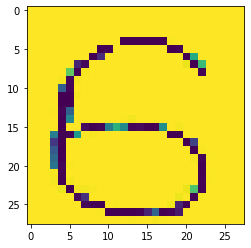

Ответ:  3


In [ ]:
test_6 = image.load_img('/content/6 or 3.jpg',target_size=(28,28) , color_mode='grayscale')
plt.imshow(test_6)
plt.show()

test_6 = image.img_to_array(test_6)
test_6  = 255-test_6

test_6 = test_6.reshape(1, 784)

test_6 = test_6.astype('float32')
test_6 = test_6 / 255

predict_6 = model.predict(test_6)

pred_6 = np.argmax(predict_6)
print("Ответ: ",pred_6)

# Распознавание цифры 7

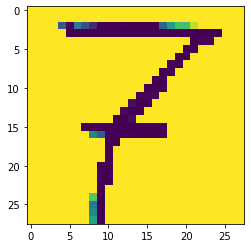

7


In [ ]:
test_7 = image.load_img('/content/7.jpg',target_size=(28,28), color_mode='grayscale')
plt.imshow(test_7)
plt.show()

test_7 = image.img_to_array(test_7)

test_7 = test_7.reshape(1,784)

test_7 = test_7.astype('float32')
test_7 = test_7 / 255

predict_7 = model.predict(test_7)

pred_7 = np.argmax(predict_7)
print(pred)

# Распознавание цифры 8

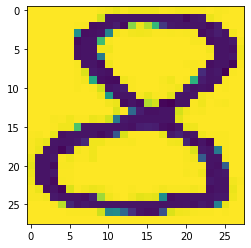

Ответ:  5


In [ ]:
test_8 = image.load_img('/content/8.jpg',target_size=(28,28), color_mode='grayscale')
plt.imshow(test_8)
plt.show()

test_8 = image.img_to_array(test_8)

test_8 = test_8.reshape(1,784)

test_8 = test_8.astype('float32')
test_8 = test_8 / 255

predict_8 = model.predict(test_8)

pred_8 = np.argmax(predict_8)
print("Ответ: ",pred_8)

# Распознавание цифры 8 похожая на 5

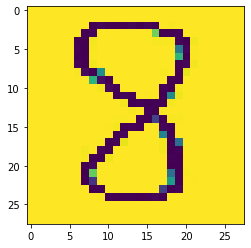

Ответ:  5


In [ ]:
test_8 = image.load_img('/content/8 or 5.jpg',target_size=(28,28), color_mode='grayscale')
plt.imshow(test_8)
plt.show()

test_8 = image.img_to_array(test_8)

test_8 = test_8.reshape(1,784)

test_8 = test_8.astype('float32')
test_8 = test_8 / 255

predict_8 = model.predict(test_8)

pred_8 = np.argmax(predict_8)
print("Ответ: ",pred_8)

# Распознавание цифры 9

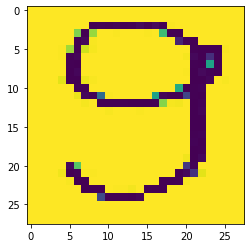

Ответ:  5


In [ ]:
test_9 = image.load_img('/content/9.jpg',target_size=(28,28), color_mode='grayscale')
plt.imshow(test_9)
plt.show()

test_9 = image.img_to_array(test_9)

test_9 = test_9.reshape(1,784)

test_9 = test_9.astype('float32')
test_9 = test_9 / 255

predict_9 = model.predict(test_9)

pred_9 = np.argmax(predict_9)
print("Ответ: ",pred_9)

Вывод:  
Не смотря на то что нейронная сеть обучилась с точностью : 0.9952  некоторые цифры определяет не совсем точно. Лучше всех определялись цифры : 1, 2, 4 , 5, 7, хотя и с ними были проблемы. 


  Хуже всех определялись цифры 3,6,8,9, а так же цифра 0, которая ни разу не определилась правильно. 


   В большинстве случаев данные цифры определялись как 5. Так же 3 и 6 определялись как цифра 8 Изменение толщины линии, стиля написания далвали не значительные результаты.

   В зависимости от разного стиля написания цифр менялся и прогноз сети.


  Вероятно это связано с тем на каких примерах училась нейронная сеть и цифра 5 нечто среднее в написании данных цифр, совпадают некоторые фрагменты.

   Так же пробовалось в Paint сохранять картинку размером 24 на 24 пикселя, результат немного хуже из-за зашумленности картинки. 

